In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd

In [29]:
np.random.seed(42)
torch.manual_seed(42)

print(np.random.seed(42))

None


In [175]:
# Data
init_volume = 25
normal_conc = 1/32
dilution = np.array([ 2, 4, 8,16,32])
kappa = np.array([ 363, 253, 174, 122.8, 84.8])

data = pd.DataFrame({
    r'Разведение': dilution,
    'объем': 50,
    'C' :normal_conc/(dilution),
    'ϰ': kappa/1000000-2.6E-6,  # Example data
})
data['Экв проводимость'] = data['ϰ']/data['C'] *1000
data['1/λ'] = 1/data['Экв проводимость']
data['λC'] = data['C'] * data['Экв проводимость']
 # Display data
display(data)


,Разведение,объем,C,ϰ,Экв проводимость,1/λ,λC
0,2,50,0.015625,0.000360,23.0656,0.043355,0.3604
1,4,50,0.007812,0.000250,32.0512,0.031200,0.2504
2,8,50,0.003906,0.000171,43.8784,0.022790,0.1714
3,16,50,0.001953,0.000120,61.5424,0.016249,0.1202
4,32,50,0.000977,0.000082,84.1728,0.011880,0.0822


[0.11291867 0.0028589 ]


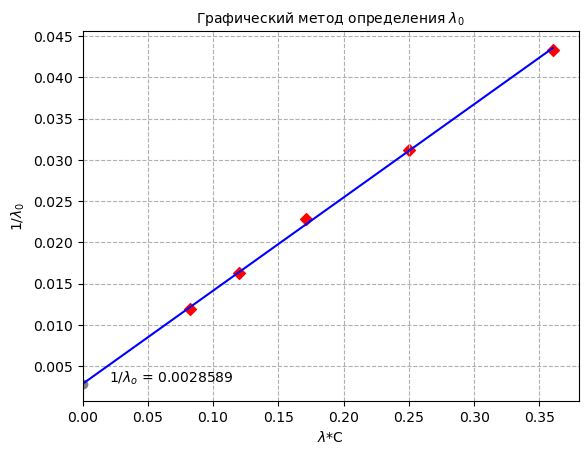

In [233]:
import matplotlib.pyplot as plt
import matplotlib

# Configure plot settings
plt.rc({
    'figure.figsize': (8, 6),
    'font.family': 'Times New Roman',
    'font.size': 25
})


# Optimized interpolation function
def interpol(x,y, degree, mark, color, colorline):
    coeffs = np.polyfit(x, y, degree)
    x_fit = np.linspace(0,x[0],1000)  
    y_fit = np.polyval(coeffs, x_fit)
    plt.plot(x_fit, y_fit, c=colorline , linestyle = '-')
    return coeffs

# Perform polynomial fits
initial_fit = interpol(data['λC'], data['1/λ'], 1, 's', 'r','b')

#Plot parameters
plt.title(r'Графический метод определения $\lambda_{0}$', fontsize=10 )
plt.xlabel(r'$\lambda$*C')
plt.ylabel(r'1/$\lambda_{0}$')
plt.scatter(data['λC'], data['1/λ'], marker = 'D', c='r',  )
plt.scatter(0, 0.0028589, color='grey')
plt.grid(linestyle = '--')
plt.xlim(0,0.38)
Lambda = 1/0.0028589
print(initial_fit)
plt.text(0.02, 0.003,r'1/$\lambda_{o}$ = 0.0028589',)
plt.show()

[-7.38579528e-01  3.08386571e-02  5.82392157e-05]


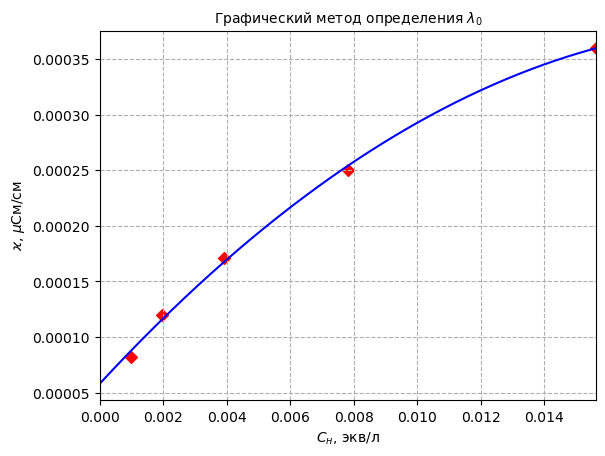

In [179]:
#Plot parameters
plt.title(r'Графический метод определения $\lambda_{0}$', fontsize=10 )
plt.xlabel('$C_н$, экв/л')
plt.ylabel(r'$ϰ $, $\mu$См/см')
plt.scatter(data['C'], data['ϰ'], marker = 'D', c='r',  )
initial_fit = interpol(data['C'], data['ϰ'], 2, 's', 'r','b')
plt.grid(linestyle = '--')
plt.xlim(0,max(data['C']))
print(initial_fit)

[-132504.43994344   39378.0620845    -4085.12415675     177.19308065]


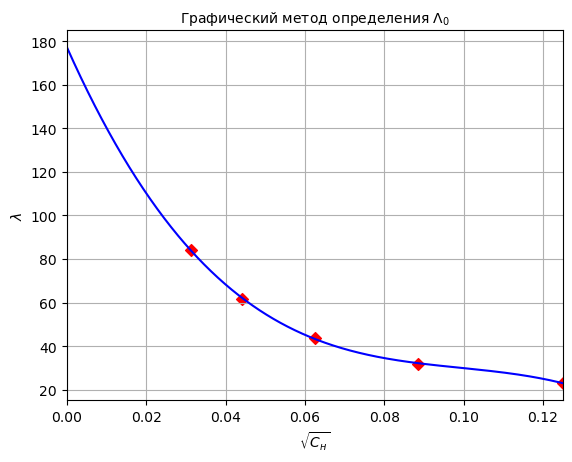

In [235]:
#Plot parameters
plt.title(r'Графический метод определения $\Lambda_{0}$', fontsize=10 )
plt.xlabel(r'$\sqrt{C_н}$')
plt.ylabel(r'$\lambda$')
plt.scatter(data['C']**0.5, data['Экв проводимость'], marker = 'D', c='r',  )
initial_fit = interpol(data['C']**0.5, data['Экв проводимость'], 3, 's', 'r','b')
plt.grid()
plt.xlim(0, max(data['C']**0.5))
print(initial_fit)
data['Степень диссоциации']  = data['Экв проводимость']/Lambda

Константа диссоциации: 9.229192054919509e-07


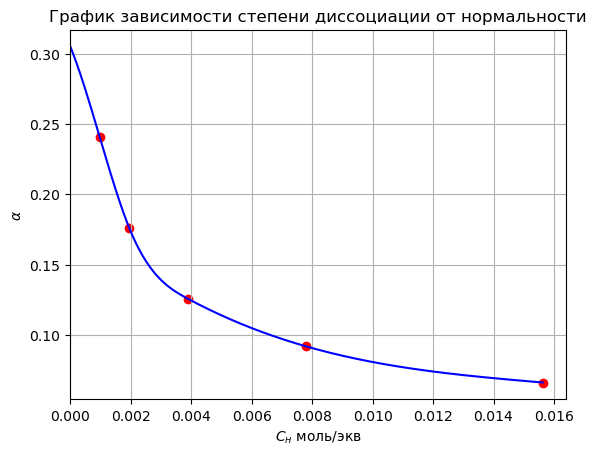

In [307]:
data
from scipy.interpolate import make_interp_spline
x1 = np.argsort(data['C'])
x_sort = data['C'][x1]
y_sort = data['Степень диссоциации'][x1]
x_new = np.linspace(0, x_sort.max(), 500)
cs = CubicSpline(x_sort, y_sort, bc_type='natural')
plt.plot(x_new, cs(x_new), color='blue')
plt.scatter(x_sort, y_sort, color='red')
plt.xlim(0,)
plt.xlabel(r'$C_н$ моль/экв')
plt.ylabel(r'$\alpha$')
plt.title("График зависимости степени диссоциации от нормальности")
plt.grid()
print(f"Константа диссоциации: {K}")

In [303]:
K = 0.11291867/(Lambda)**2
K

9.229192054919509e-07

In [305]:
data

,Разведение,объем,C,ϰ,Экв проводимость,1/λ,λC,Степень диссоциации
0,2,50,0.015625,0.000360,23.0656,0.043355,0.3604,0.065942
1,4,50,0.007812,0.000250,32.0512,0.031200,0.2504,0.091631
2,8,50,0.003906,0.000171,43.8784,0.022790,0.1714,0.125444
3,16,50,0.001953,0.000120,61.5424,0.016249,0.1202,0.175944
4,32,50,0.000977,0.000082,84.1728,0.011880,0.0822,0.240642


(0.0, 0.016)

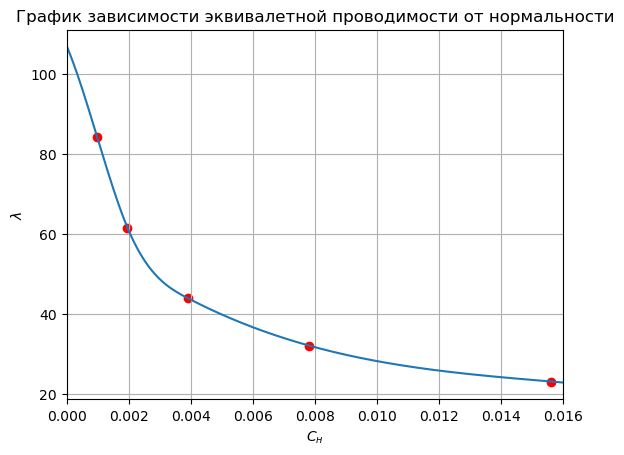

In [343]:
plt.scatter(data['C'], data['Экв проводимость'], color='red')
sort_idx = np.argsort(data['C'])
x_sorted = data['C'][sort_idx]
y_sorted = data['Экв проводимость'][sort_idx]
cs1 = CubicSpline(x_sorted, y_sorted, bc_type='natural')
x1 = np.linspace(0, 0.016, 1000)
plt.plot(x1, cs1(x1))
plt.grid()
plt.xlabel(r"$C_н$")
plt.ylabel(r'$\lambda$')
plt.title('График зависимости эквивалетной проводимости от нормальности')
plt.xlim(0,0.016)